In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as scikit_learn
import os
import seaborn as sns
import matplotlib.cm as cm

plt.rcParams["figure.figsize"] = (6, 4)

In [3]:
train = pd.read_csv("train.csv", index_col = "Id")
test = pd.read_csv("test-full.csv", index_col = "Id")

In [4]:
train.head(5)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Id,,,,,,,,,,,,,,,,,,,,,
242642,2881,130,22,210,54,1020,250,221,88,342,...,0,0,0,0,0,0,0,0,0,1
309891,3005,351,14,242,-16,1371,194,215,159,842,...,0,0,0,0,0,0,0,0,0,1
287847,3226,63,14,618,2,1092,232,210,107,2018,...,0,0,0,0,0,0,0,0,0,1
516307,3298,317,8,661,60,752,198,233,174,1248,...,0,0,0,0,0,0,0,0,0,1
124860,3080,35,6,175,26,3705,219,227,144,2673,...,0,0,0,0,0,0,0,0,0,1


## Exploratory Data Analysis

In [5]:
print(train.columns)

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

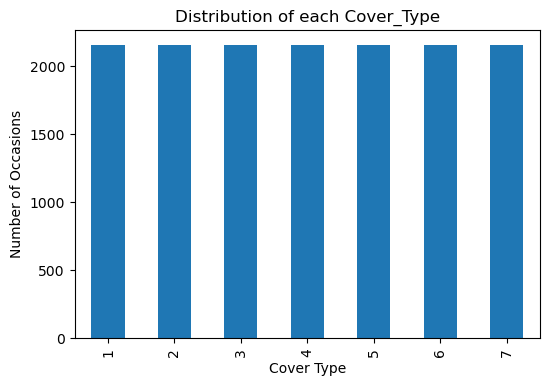

In [6]:
train["Cover_Type"].value_counts().sort_index().plot(kind="bar")
plt.xlabel("Cover Type")
plt.ylabel("Number of Occasions")
plt.title("Distribution of each Cover_Type")
plt.show()

The cover types are balanced

In [7]:
print(train.loc[:, "Wilderness_Area1":"Wilderness_Area4"].head())

        Wilderness_Area1  Wilderness_Area2  Wilderness_Area3  Wilderness_Area4
Id                                                                            
242642                 1                 0                 0                 0
309891                 0                 0                 1                 0
287847                 1                 0                 0                 0
516307                 0                 1                 0                 0
124860                 1                 0                 0                 0


The count of Wilderness_Area1 is: 3568
The count of Wilderness_Area2 is: 569
The count of Wilderness_Area3 is: 6302
The count of Wilderness_Area4 is: 4681


<BarContainer object of 4 artists>

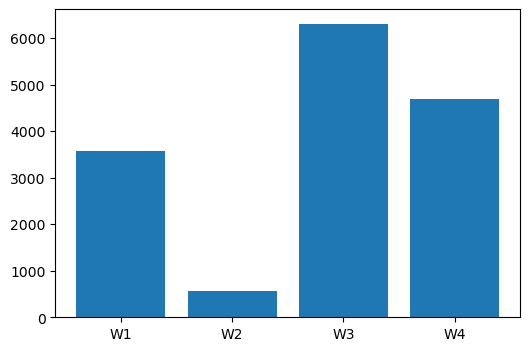

In [8]:
wilderness1 = np.sum(train.loc[:, "Wilderness_Area1"])
wilderness2 = np.sum(train.loc[:, "Wilderness_Area2"])
wilderness3 = np.sum(train.loc[:, "Wilderness_Area3"])
wilderness4 = np.sum(train.loc[:, "Wilderness_Area4"])

print(f"The count of Wilderness_Area1 is: {wilderness1}")
print(f"The count of Wilderness_Area2 is: {wilderness2}")
print(f"The count of Wilderness_Area3 is: {wilderness3}")
print(f"The count of Wilderness_Area4 is: {wilderness4}")

colors = plt.colormaps["tab10"].resampled(4)

plt.bar(
    ["W1", "W2", "W3", "W4"],
    [wilderness1, wilderness2, wilderness3, wilderness4],
)

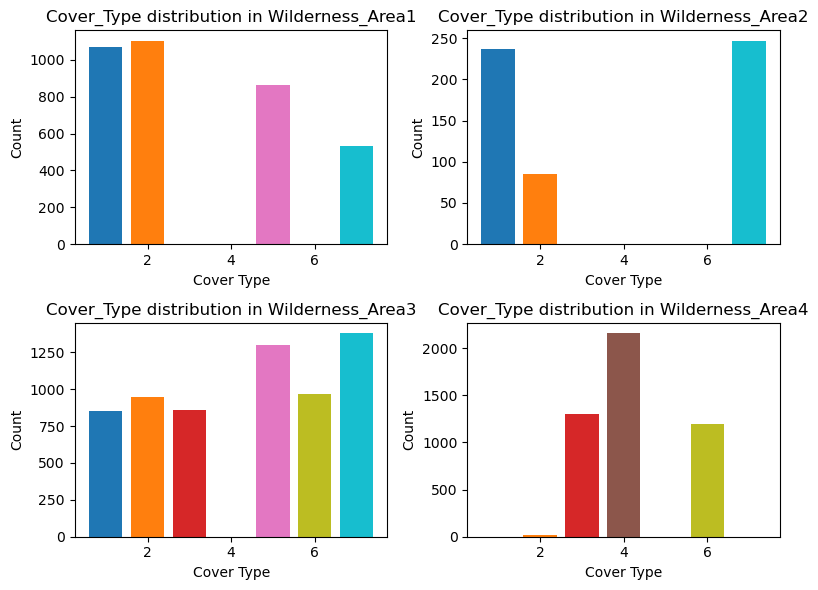

In [9]:
wilderness_cols = ["Wilderness_Area1", "Wilderness_Area2", "Wilderness_Area3", "Wilderness_Area4"]

fig, axes = plt.subplots(2, 2, figsize=(8, 6))
axes = axes.flatten()
colors = plt.colormaps["tab10"].resampled(7)

for ax, col in zip(axes, wilderness_cols):
    counts = train.groupby("Cover_Type")[col].sum()
    ax.bar(counts.index, counts.values, color = [colors(i) for i in range(7)])
    ax.set_title(f"Cover_Type distribution in {col}")
    ax.set_xlabel("Cover Type")
    ax.set_ylabel("Count")

plt.tight_layout()
plt.show()

There is a strong disproportion in terms of each wilderness area. And in how they split into the cover types, so this columns will be excluded for the model training

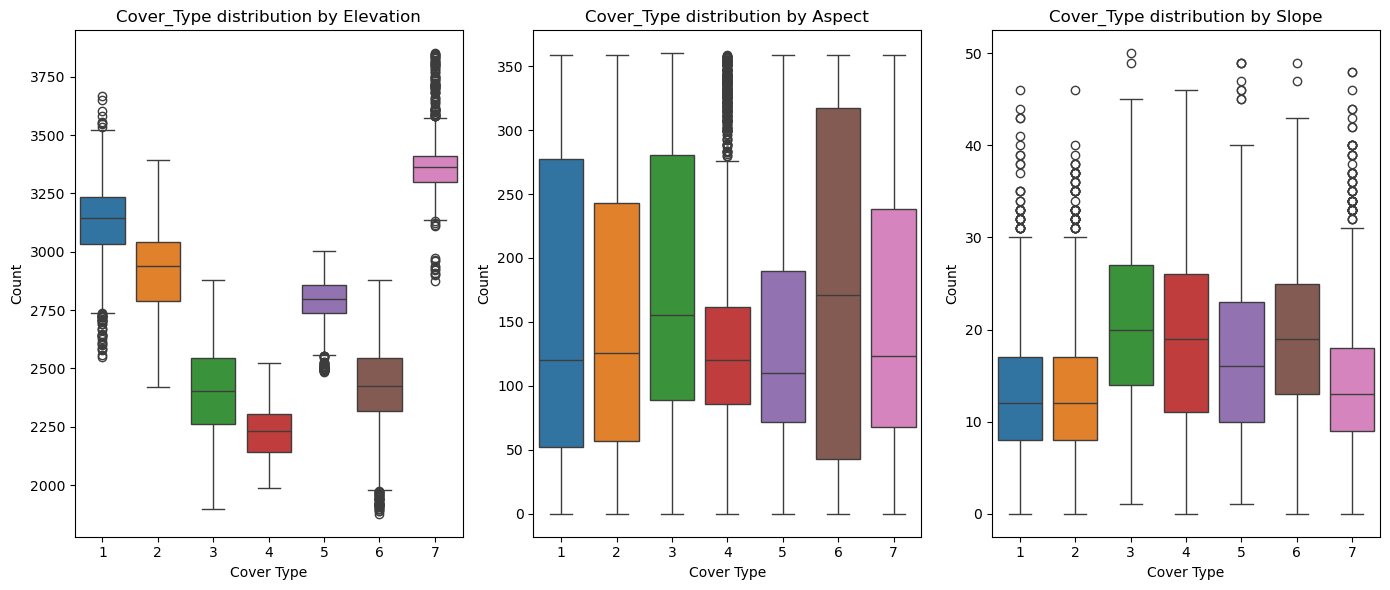

In [10]:
columns = ["Elevation", "Aspect", "Slope"]

fig, axes = plt.subplots(1, 3, figsize=(14, 6))
axes = axes.flatten()

for ax, col in zip(axes, columns):
    counts = train.groupby("Cover_Type")[col].sum()
    sns.boxplot(data = train, x = "Cover_Type", y = col, palette = "tab10", legend=False, hue = "Cover_Type", ax = ax)
    ax.set_title(f"Cover_Type distribution by {col}")
    ax.set_xlabel("Cover Type")
    ax.set_ylabel("Count")

plt.tight_layout()
plt.show()

Aspect like that doesn't seem to give good insights. We will later transform it to sin & cos to train the model

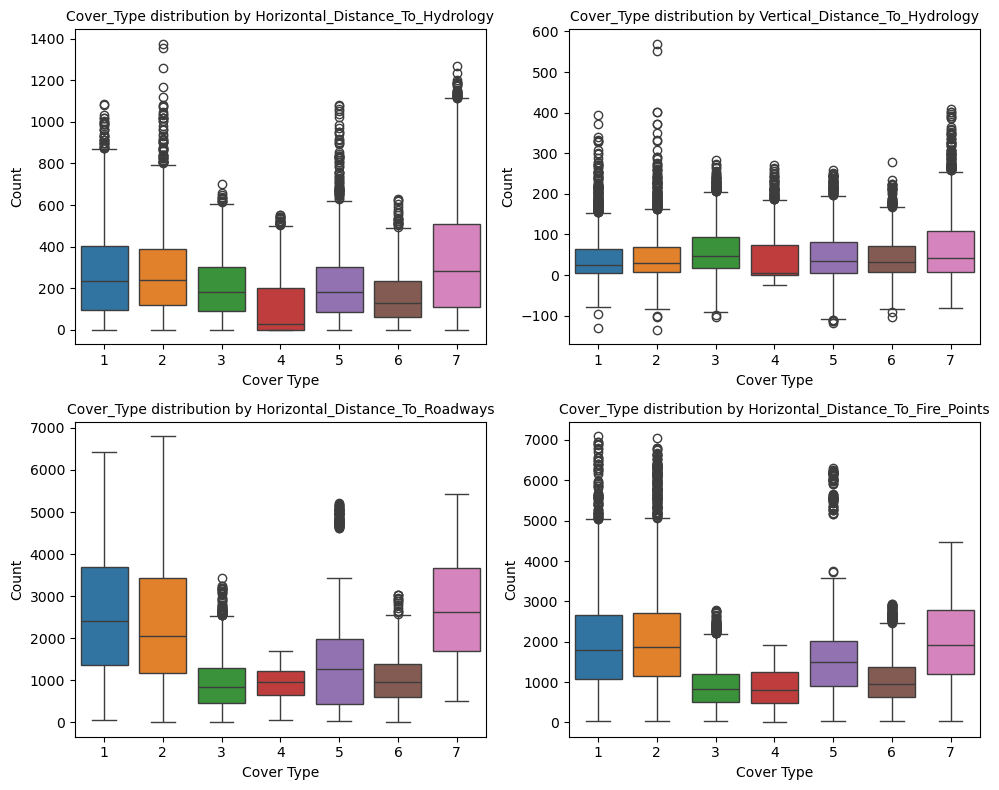

In [11]:
columns = ['Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points']

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

for ax, col in zip(axes, columns):
    counts = train.groupby("Cover_Type")[col].sum()
    sns.boxplot(data = train, x = "Cover_Type", y = col, palette = "tab10", legend=False, hue = "Cover_Type", ax = ax)
    ax.set_title(f"Cover_Type distribution by {col}", fontsize = 10)
    ax.set_xlabel("Cover Type", fontsize = 10)
    ax.set_ylabel("Count", fontsize = 10)

plt.tight_layout()
plt.show()

The horizontal and vertical distance appear to be good parameters for the model. Even if vertical distance to hidrology looks similar between different cover types

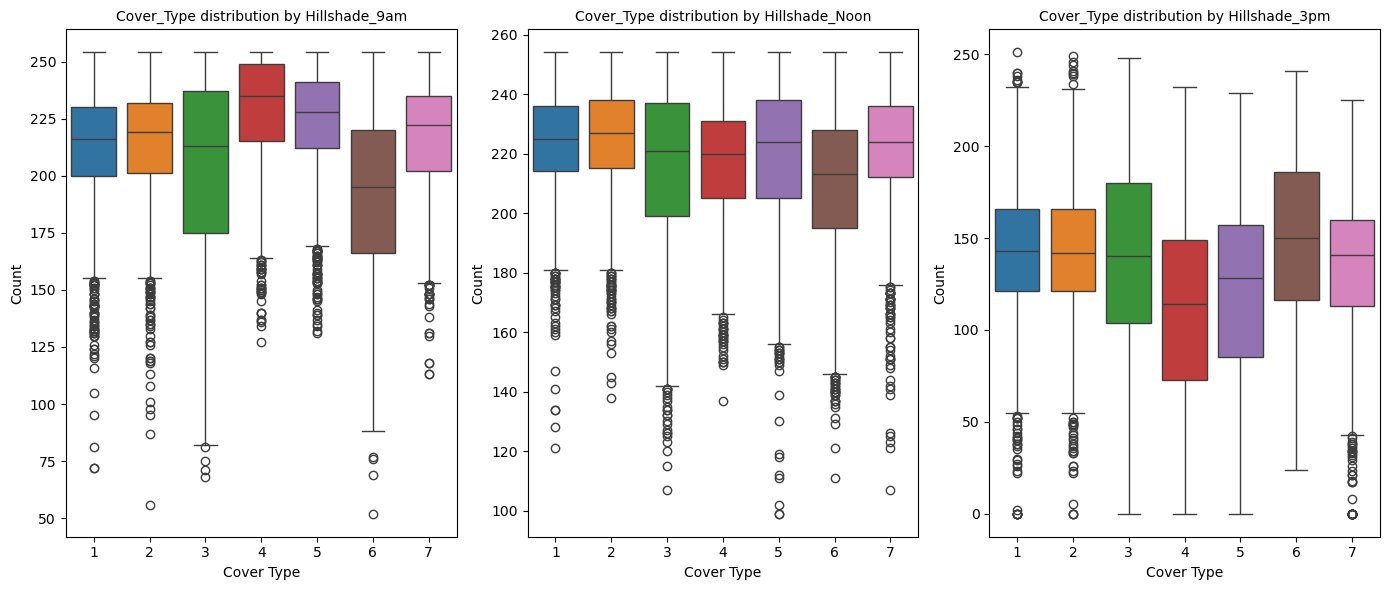

In [12]:
columns = ['Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm']

fig, axes = plt.subplots(1, 3, figsize=(14, 6))
axes = axes.flatten()

for ax, col in zip(axes, columns):
    counts = train.groupby("Cover_Type")[col].sum()
    sns.boxplot(data = train, x = "Cover_Type", y = col, palette = "tab10", legend=False, hue = "Cover_Type", ax = ax)
    ax.set_title(f"Cover_Type distribution by {col}", fontsize = 10)
    ax.set_xlabel("Cover Type", fontsize = 10)
    ax.set_ylabel("Count", fontsize = 10)

plt.tight_layout()
plt.show()

Hillshade appears to be a good parameter for the model, as it can be seem that it varies between the different cover types. To enrich the analysis, I will add a new column with the average hillshade

In [13]:
train.head(2)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Id,,,,,,,,,,,,,,,,,,,,,
242642,2881,130,22,210,54,1020,250,221,88,342,...,0,0,0,0,0,0,0,0,0,1
309891,3005,351,14,242,-16,1371,194,215,159,842,...,0,0,0,0,0,0,0,0,0,1


## Data transformation

In [14]:
train["Aspect_sin"] = np.sin(np.deg2rad(train["Aspect"]))
train["Aspect_cos"] = np.sin(np.deg2rad(train["Aspect"]))
train["Average_Hillshade"] = train[["Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm"]].mean(axis=1)

test["Aspect_sin"] = np.sin(np.deg2rad(test["Aspect"]))
test["Aspect_cos"] = np.sin(np.deg2rad(test["Aspect"]))
test["Average_Hillshade"] = test[["Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm"]].mean(axis=1)


train = train.drop(columns=["Aspect"])
test = test.drop(columns=["Aspect"])

In [15]:
# removing wilderness columns

train = train.drop(columns = ['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4'])
test = test.drop(columns = ['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4'])

In [16]:
train.head()

,Elevation,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Soil_Type1,...,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,Aspect_sin,Aspect_cos,Average_Hillshade
Id,,,,,,,,,,,,,,,,,,,,,
242642,2881,22,210,54,1020,250,221,88,342,0,...,0,0,0,0,0,0,1,0.766044,0.766044,186.333333
309891,3005,14,242,-16,1371,194,215,159,842,0,...,0,0,0,0,0,0,1,-0.156434,-0.156434,189.333333
287847,3226,14,618,2,1092,232,210,107,2018,0,...,0,0,0,0,0,0,1,0.891007,0.891007,183.000000
516307,3298,8,661,60,752,198,233,174,1248,0,...,0,0,0,0,0,0,1,-0.681998,-0.681998,201.666667
124860,3080,6,175,26,3705,219,227,144,2673,0,...,0,0,0,0,0,0,1,0.573576,0.573576,196.666667


## Model training

In [17]:
# code for this part was mostly generated by artificial intelligence, with me on loop adjusting it

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X = train.drop(columns=["Cover_Type"])
y = train["Cover_Type"]                

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [18]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)

In [19]:
y_pred = rf.predict(X_valid)

print(f"Accuracy: {str(accuracy_score(y_valid, y_pred))[:5]}")
print(classification_report(y_valid, y_pred))

Accuracy: 0.844
              precision    recall  f1-score   support

           1       0.75      0.73      0.74       432
           2       0.78      0.67      0.72       432
           3       0.83      0.83      0.83       432
           4       0.93      0.95      0.94       432
           5       0.88      0.93      0.91       432
           6       0.83      0.87      0.85       432
           7       0.89      0.94      0.92       432

    accuracy                           0.84      3024
   macro avg       0.84      0.84      0.84      3024
weighted avg       0.84      0.84      0.84      3024



In [20]:
y_test_pred = rf.predict(test)

submission = pd.DataFrame({
    "Id": test.index,
    "Cover_Type": y_test_pred
})
submission.to_csv("my_submission.csv", index=False)